In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv(r'D:\portfolio\Fractal MMM\Assignment\PYQ2\data\mmm_data_prepared.csv')

In [3]:
# Step 1: Define the target (log(Sales))
df["log_Sales"] = np.log1p(df["Sales"])

# Step 2: Select feature sets
log_spends = [
    "log_Email_Spends_Adstock",
    "log_Modular_Video_Spends_Adstock",
    "log_Paid_Social_Spends_Adstock",
    "log_Paid_Search_Spends_Adstock"
]

saturation = [
    "Email_Spends_Saturation",
    "Modular_Video_Spends_Saturation",
    "Paid_Social_Spends_Saturation",
    "Paid_Search_Spends_Saturation"
]

interaction_terms = [
    "log_Email_Spends_Adstock_x_log_Modular_Video_Spends_Adstock",
    "log_Email_Spends_Adstock_x_log_Paid_Social_Spends_Adstock",
    "log_Email_Spends_Adstock_x_log_Paid_Search_Spends_Adstock",
    "log_Modular_Video_Spends_Adstock_x_log_Paid_Social_Spends_Adstock",
    "log_Modular_Video_Spends_Adstock_x_log_Paid_Search_Spends_Adstock",
    "log_Paid_Social_Spends_Adstock_x_log_Paid_Search_Spends_Adstock"
]

control_vars = [
    "Discount1", "Discount2", "Holiday Dummy", "Total SKU",
    "Gasoline Price", "Average Price"
]

# Combine all features
features = log_spends + saturation + interaction_terms + control_vars

import statsmodels.api as sm

# Prepare features and target 
X = df[features]
y = df["log_Sales"]

# Add constant (intercept)
X = sm.add_constant(X)

# Fit the model using statsmodels
model_sm = sm.OLS(y, X).fit()

# Get model summary
model_summary = model_sm.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_Sales   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     13.25
Date:                Mon, 14 Apr 2025   Prob (F-statistic):           4.61e-20
Time:                        00:30:36   Log-Likelihood:                 178.00
No. Observations:                 122   AIC:                            -314.0
Df Residuals:                     101   BIC:                            -255.1
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================================
                                                                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------
const                                                             -3018.9445   1.43e+04     -0.211      0.833   -3.14e+04    2.54e+04
log_Email_Spends_Adstock                                              5.5328      2.900      1.908      0.059      -0.219      11.285
log_Modular_Video_Spends_Adstock                                      3.5493      2.706      1.312      0.193      -1.818       8.917
log_Paid_Social_Spends_Adstock                                       -0.6165      3.242     -0.190      0.850      -7.048       5.815
log_Paid_Search_Spends_Adstock                                       -0.7363      0.577     -1.275      0.205      -1.881       0.409
Email_Spends_Saturation                                            2268.9839   1397.840      1.623      0.108    -503.955    5041.923
Modular_Video_Spends_Saturation                                   -2993.1830    982.383     -3.047      0.003   -4941.967   -1044.399
Paid_Social_Spends_Saturation                                      3700.6447   1.41e+04      0.263      0.793   -2.42e+04    3.16e+04
Paid_Search_Spends_Saturation                                        -0.0580      0.045     -1.291      0.200      -0.147       0.031
log_Email_Spends_Adstock_x_log_Modular_Video_Spends_Adstock          -0.3225      0.110     -2.927      0.004      -0.541      -0.104
log_Email_Spends_Adstock_x_log_Paid_Social_Spends_Adstock            -0.0567      0.177     -0.319      0.750      -0.409       0.295
log_Email_Spends_Adstock_x_log_Paid_Search_Spends_Adstock             0.0206      0.023      0.895      0.373      -0.025       0.066
log_Modular_Video_Spends_Adstock_x_log_Paid_Social_Spends_Adstock     0.0745      0.152      0.490      0.625      -0.227       0.376
log_Modular_Video_Spends_Adstock_x_log_Paid_Search_Spends_Adstock     0.0232      0.029      0.808      0.421      -0.034       0.080
log_Paid_Social_Spends_Adstock_x_log_Paid_Search_Spends_Adstock       0.0101      0.015      0.668      0.506      -0.020       0.040
Discount1                                                            -0.2849      0.132     -2.163      0.033      -0.546      -0.024
Discount2                                                             0.1694      0.099      1.717      0.089      -0.026       0.365
Holiday Dummy                                                        -0.3630      0.055     -6.575      0.000      -0.472      -0.253
Total SKU                                                         -1.408e-08   9.72e-09     -1.448      0.151   -3.34e-08     5.2e-09
Gasoline Price                                                       -0.0001   8.17e-05     -1.233      0.220      -0.000    6.13e-05
A


### Model Stats

|Metric|Value|
|---|---|
|**R²**|0.724|
|**Adj. R²**|0.669|
|**F-statistic (p)**|4.61e-20|
|**# Observations**|122|

**Strong model fit**: You're explaining **72.4%** of the variation in `log(Sales)` with your variables.

### **Media Channels & Saturation Effects**

| Variable                           | Coef      | p-value | Insight                                                                                                                                                                       |
| ---------------------------------- | --------- | ------- | ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **`log_Email_Spends_Adstock`**     | **+5.53** | 0.059   | **Marginally significant.** Strong positive elasticity. Email is highly responsive — a 1% increase in email spend → ~5.5% increase in sales. Likely a top-performing channel. |
| `log_Modular_Video_Spends_Adstock` | +3.55     | 0.193   | Not significant. May contribute, but not strongly by itself. Could be redundant with saturation or interactions.                                                              |
| `log_Paid_Social_Spends_Adstock`   | –0.62     | 0.850   | Not significant, and negative. Indicates little to no isolated lift from social spend. Possibly over-saturated or under-leveraged.                                            |
| `log_Paid_Search_Spends_Adstock`   | –0.74     | 0.205   | Not significant. May require pairing with other channels or better targeting.                                                                                                 |


### **Saturation-Transformed Media**

| Variable                              | Coef         | p-value   | Insight                                                                                                                                                      |
| ------------------------------------- | ------------ | --------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| `Email_Spends_Saturation`             | +2268.98     | 0.108     | Marginally useful. Suggests Email maintains its impact even after adjusting for diminishing returns.                                                         |
| **`Modular_Video_Spends_Saturation`** | **–2993.18** | **0.003** |  **Highly significant.** Strong negative effect after saturation — may indicate overspending or inefficiency in video campaigns. Needs serious optimization. |
| `Paid_Social_Spends_Saturation`       | +3700.64     | 0.793     | Not significant. Wide confidence interval — noisy, not reliable.                                                                                             |
| `Paid_Search_Spends_Saturation`       | –0.06        | 0.200     | Slightly negative but not significant. Could be due to overlapping effects with raw log-spends.                                                              |


## **Interaction Effects (Synergy)**

| Variable          | Coef      | p-value   | Insight                                                                                                                                   |
| ----------------- | --------- | --------- | ----------------------------------------------------------------------------------------------------------------------------------------- |
| **Email × Video** | **–0.32** | **0.004** |  **Significant negative interaction.** These channels may be **cannibalizing** each other — running together could be hurting efficiency. |
| Email × Social    | –0.06     | 0.750     | No synergy detected. Likely neutral.                                                                                                      |
| Email × Search    | +0.02     | 0.373     | Not significant — minimal amplification effect.                                                                                           |
| Video × Social    | +0.07     | 0.625     | Not significant — expected synergy not supported.                                                                                         |
| Video × Search    | +0.02     | 0.421     | Not meaningful.                                                                                                                           |
| Social × Search   | +0.01     | 0.506     | Very minor synergy — not statistically useful.                                                                                            |


## **Control Variables**

| Variable                                       | Coef            | p-value    | Insight                                                                                                             |
| ---------------------------------------------- | --------------- | ---------- | ------------------------------------------------------------------------------------------------------------------- |
| **`Discount1`**                                | **–0.28**       | **0.033**  | Significant negative. Suggests deep discounts may hurt brand perception or signal too much price sensitivity.       |
| `Discount2`                                    | +0.17           | 0.089      | Marginally positive. May reflect smaller, more effective discounts.                                                 |
| **`Holiday Dummy`**                            | **–0.36**       | **<0.001** | Highly significant. Sales are lower during holidays — possible store closures, seasonality, or pull-forward effect. |
| `Total SKU`, `Gasoline Price`, `Average Price` | Not significant |            | Consider simplifying or refining these in future models.                                                            |


## Final Takeaways

- **Email is our top-performing channel** — strong elasticity and saturation-adjusted strength.
    
-  **Modular Video may be overinvested** — significant negative return after adjusting for saturation.
    
- **Email × Video interaction is hurting performance** — avoid overlapping these too closely.
    
- Discounts and holidays have meaningful effects — these need to be actively modeled in forecasting.


In [4]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Define your full feature set
features = log_spends + saturation + interaction_terms + control_vars

# Add a constant
X_vif = sm.add_constant(df[features])

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]


d:\my_envs\mlflowdemo1\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


In [5]:
vif_data

,Feature,VIF
0,const,0.000000
1,log_Email_Spends_Adstock,17314.765351
2,log_Modular_Video_Spends_Adstock,33570.653217
3,log_Paid_Social_Spends_Adstock,50838.358373
4,log_Paid_Search_Spends_Adstock,90867.753516
5,Email_Spends_Saturation,237.303135
6,Modular_Video_Spends_Saturation,796.063563
7,Paid_Social_Spends_Saturation,249.043182
8,Paid_Search_Spends_Saturation,14.950996
9,log_Email_Spends_Adstock_x_log_Modular_Video_S...,11186.092804


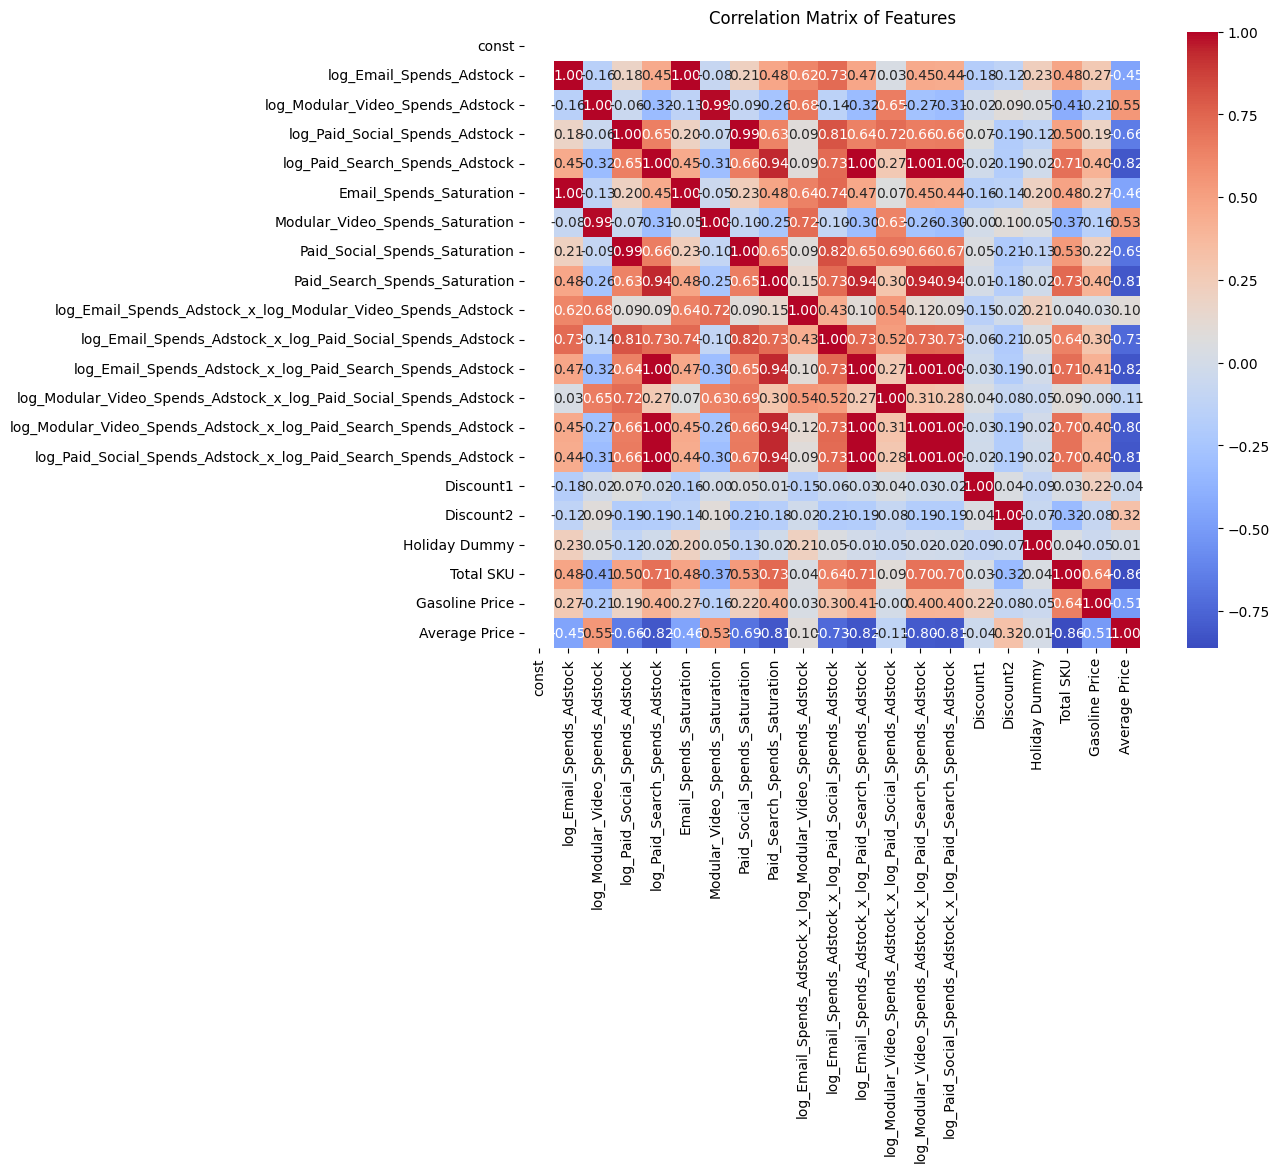

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
# Plotting the correlation matrix   
plt.figure(figsize=(12, 8))
corr = X_vif.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f", square=True)
plt.title("Correlation Matrix of Features")
plt.show()

In [7]:
# Define cleaned feature set
# Keep only saturation terms (1 per media), significant interaction (Email × Video), and controls
clean_features = [
    "Email_Spends_Saturation",
    "Modular_Video_Spends_Saturation",
    "Paid_Social_Spends_Saturation",
    "Paid_Search_Spends_Saturation",
    "log_Email_Spends_Adstock_x_log_Modular_Video_Spends_Adstock",  # significant interaction
    "Discount1", "Discount2", "Holiday Dummy", "Total SKU",
    "Gasoline Price", "Average Price"
]

# Prepare data
X_clean = sm.add_constant(df[clean_features])
y_clean = np.log1p(df["Sales"])

# Fit model
clean_model = sm.OLS(y_clean, X_clean).fit()

# Return summary
clean_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     17.35
Date:                Mon, 14 Apr 2025   Prob (F-statistic):           2.03e-19
Time:                        00:30:39   Log-Likelihood:                 160.83
No. Observations:                 122   AIC:                            -297.7
Df Residuals:                     110   BIC:                            -264.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================================================================
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------
const                                                       -1766.3822   1937.390     -0.912      0.364   -5605.835    2073.071
Email_Spends_Saturation                                       250.1297    536.744      0.466      0.642    -813.571    1313.830
Modular_Video_Spends_Saturation                              -184.6747    228.491     -0.808      0.421    -637.491     268.142
Paid_Social_Spends_Saturation                                1723.0823   1696.281      1.016      0.312   -1638.549    5084.713
Paid_Search_Spends_Saturation                                   0.0791      0.026      3.089      0.003       0.028       0.130
log_Email_Spends_Adstock_x_log_Modular_Video_Spends_Adstock     0.0017      0.009      0.191      0.849      -0.016       0.020
Discount1                                                      -0.3258      0.136     -2.391      0.018      -0.596      -0.056
Discount2                                                       0.0565      0.098      0.579      0.564      -0.137       0.250
Holiday Dummy                                                  -0.3609      0.054     -6.685      0.000      -0.468      -0.254
Total SKU                                                    -3.21e-08   7.38e-09     -4.349      0.000   -4.67e-08   -1.75e-08
Gasoline Price                                                 -0.0001   7.09e-05     -1.471      0.144      -0.000    3.62e-05
Average Price                                                  -0.2116      0.093     -2.284      0.024      -0.395      -0.028
==============================================================================
Omnibus:                       38.135   Durbin-Watson:                   0.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.769
Skew:                          -1.352   Prob(JB):                     1.58e-16
Kurtosis:                       5.646   Cond. No.                     1.13e+13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+13. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
# Estimate marginal ROI (mROI) for each media channel based on saturation terms
# mROI = % change in Sales for a 1% change in spend (based on coefficients)

# Pull coefficients
coefs = clean_model.params

# Media saturation features
media_vars = [
    "Email_Spends_Saturation",
    "Modular_Video_Spends_Saturation",
    "Paid_Social_Spends_Saturation",
    "Paid_Search_Spends_Saturation"
]

# Average spend per channel (proxy for marginal spend level)
avg_spends = df[media_vars].mean()

# Estimate marginal ROI = coefficient / average spend
mroi = pd.DataFrame({
    "Channel": media_vars,
    "Coefficient": [coefs.get(var, np.nan) for var in media_vars],
    "Avg Spend (Saturation)": avg_spends.values
})

mroi["Marginal ROI"] = mroi["Coefficient"] / mroi["Avg Spend (Saturation)"]

# Sort by mROI
mroi = mroi.sort_values(by="Marginal ROI", ascending=False)
mroi.reset_index(drop=True, inplace=True)

mroi


,Channel,Coefficient,Avg Spend (Saturation),Marginal ROI
0,Paid_Social_Spends_Saturation,1723.082328,0.999973,1723.129417
1,Email_Spends_Saturation,250.129708,0.999530,250.247208
2,Paid_Search_Spends_Saturation,0.079081,0.563121,0.140434
3,Modular_Video_Spends_Saturation,-184.674675,0.999000,-184.859519


In [9]:
# Set up a simulation to reallocate budget from Modular Video to Paid Search
# Assumptions:
# - Keep total spend constant (fixed "saturation spend pool")
# - Only shift between Video and Search
# - Estimate change in predicted log-sales

# Step 1: Use average saturation levels
current_spend = df[[
    "Email_Spends_Saturation",
    "Modular_Video_Spends_Saturation",
    "Paid_Social_Spends_Saturation",
    "Paid_Search_Spends_Saturation"
]].mean()

# Step 2: Set a fixed budget (total of Video + Search)
video_search_total = current_spend["Modular_Video_Spends_Saturation"] + current_spend["Paid_Search_Spends_Saturation"]

# Step 3: Simulate reallocation — shift budget in steps from Video → Search
reallocation = []
search_coef = coefs["Paid_Search_Spends_Saturation"]
video_coef = coefs["Modular_Video_Spends_Saturation"]

for pct_shift in np.linspace(0, 1, 21):  # from 0% to 100% shift
    new_search = video_search_total * pct_shift
    new_video = video_search_total * (1 - pct_shift)
    impact = (new_search * search_coef) + (new_video * video_coef)
    reallocation.append({
        "Pct_Shift_to_Search": pct_shift,
        "Search_Spend": new_search,
        "Video_Spend": new_video,
        "Estimated_Log_Sales_Impact": impact
    })

reallocation_df = pd.DataFrame(reallocation)

reallocation_df

,Pct_Shift_to_Search,Search_Spend,Video_Spend,Estimated_Log_Sales_Impact
0,0.00,0.000000,1.562121,-288.484249
1,0.05,0.078106,1.484015,-274.053860
2,0.10,0.156212,1.405909,-259.623471
3,0.15,0.234318,1.327803,-245.193082
4,0.20,0.312424,1.249697,-230.762693
5,0.25,0.390530,1.171591,-216.332303
6,0.30,0.468636,1.093485,-201.901914
7,0.35,0.546742,1.015379,-187.471525
8,0.40,0.624849,0.937273,-173.041136
9,0.45,0.702955,0.859167,-158.610747


In [10]:
from scipy.optimize import minimize

# Step 1: Get saturation coefficients from model
saturation_coefs = {
    "Email_Spends_Saturation": coefs["Email_Spends_Saturation"],
    "Modular_Video_Spends_Saturation": coefs["Modular_Video_Spends_Saturation"],
    "Paid_Social_Spends_Saturation": coefs["Paid_Social_Spends_Saturation"],
    "Paid_Search_Spends_Saturation": coefs["Paid_Search_Spends_Saturation"]
}

# Step 2: Define the objective function (negative log-sales to minimize)
def objective(sat_spends):
    log_sales = sum(sat_spends[i] * list(saturation_coefs.values())[i] for i in range(len(sat_spends)))
    return -log_sales  # We want to maximize sales, so minimize negative

# Step 3: Constraints
total_budget = sum(df[list(saturation_coefs.keys())].mean())  # keep total saturation spend constant
constraints = [{"type": "eq", "fun": lambda x: sum(x) - total_budget}]
bounds = [(0, total_budget) for _ in range(4)]  # each spend must be >=0 and <= total

# Step 4: Initial guess (current average saturation spends)
initial_guess = df[list(saturation_coefs.keys())].mean().values

# Step 5: Run optimizer
result = minimize(objective, initial_guess, bounds=bounds, constraints=constraints)

# Step 6: Format results
optimized_spend = pd.DataFrame({
    "Channel": list(saturation_coefs.keys()),
    "Optimized_Saturation_Spend": result.x,
    "Current_Saturation_Spend": initial_guess
})
optimized_spend["Change"] = optimized_spend["Optimized_Saturation_Spend"] - optimized_spend["Current_Saturation_Spend"]

optimized_spend

,Channel,Optimized_Saturation_Spend,Current_Saturation_Spend,Change
0,Email_Spends_Saturation,0.000000,0.999530,-0.999530
1,Modular_Video_Spends_Saturation,0.000000,0.999000,-0.999000
2,Paid_Social_Spends_Saturation,3.561624,0.999973,2.561652
3,Paid_Search_Spends_Saturation,0.000000,0.563121,-0.563121


In [15]:
# Total budget (same as before)
total_budget = sum(df[list(saturation_coefs.keys())].mean())

# Define % caps (as proportions of total budget)
bounds_percent = {
    "Email_Spends_Saturation": (0.05, 0.25),
    "Modular_Video_Spends_Saturation": (0.05, 0.30),
    "Paid_Social_Spends_Saturation": (0.10, 0.40),
    "Paid_Search_Spends_Saturation": (0.10, 0.25)
}

# Convert % bounds into actual spend bounds
bounds = [
    (total_budget * bounds_percent[channel][0], total_budget * bounds_percent[channel][1])
    for channel in saturation_coefs.keys()
]
bounds

[(0.17808122333312015, 0.8904061166656007),
 (0.17808122333312015, 1.0684873399987207),
 (0.3561624466662403, 1.4246497866649612),
 (0.3561624466662403, 0.8904061166656007)]

In [16]:
# === Step 1: Define model coefficients ===
saturation_coefs = {
    "Email_Spends_Saturation": coefs["Email_Spends_Saturation"],
    "Modular_Video_Spends_Saturation": coefs["Modular_Video_Spends_Saturation"],
    "Paid_Social_Spends_Saturation": coefs["Paid_Social_Spends_Saturation"],
    "Paid_Search_Spends_Saturation": coefs["Paid_Search_Spends_Saturation"]
}

channels = list(saturation_coefs.keys())

# === Step 2: Total current budget ===
total_budget = sum(df[channels].mean())

# === Step 3: Define caps/floors as % of total budget ===
bounds_percent = {
    "Email_Spends_Saturation": (0.05, 0.25),
    "Modular_Video_Spends_Saturation": (0.05, 0.30),
    "Paid_Social_Spends_Saturation": (0.10, 0.40),
    "Paid_Search_Spends_Saturation": (0.10, 0.25)
}

# === Step 4: Convert bounds to real budget amounts ===
bounds = [
    (total_budget * bounds_percent[channel][0], total_budget * bounds_percent[channel][1])
    for channel in channels
]

# === Step 5: Objective function (maximize log-sales) ===
def objective(sat_spends):
    log_sales = sum(sat_spends[i] * list(saturation_coefs.values())[i] for i in range(len(sat_spends)))
    return -log_sales  # minimize negative to maximize log-sales

# === Step 6: Constraint: total budget must stay fixed ===
constraints = [{"type": "eq", "fun": lambda x: sum(x) - total_budget}]

# === Step 7: Initial guess — current average spend ===
initial_guess = df[channels].mean().values

# === Step 8: Run optimizer ===
result = minimize(objective, initial_guess, bounds=bounds, constraints=constraints)

# === Step 9: Format results ===
optimized_spend = pd.DataFrame({
    "Channel": channels,
    "Optimized_Saturation_Spend": result.x,
    "Current_Saturation_Spend": initial_guess
})
optimized_spend["Change"] = optimized_spend["Optimized_Saturation_Spend"] - optimized_spend["Current_Saturation_Spend"]

# Display final table
optimized_spend


,Channel,Optimized_Saturation_Spend,Current_Saturation_Spend,Change
0,Email_Spends_Saturation,0.890406,0.999530,-0.109124
1,Modular_Video_Spends_Saturation,0.356162,0.999000,-0.642838
2,Paid_Social_Spends_Saturation,1.424650,0.999973,0.424677
3,Paid_Search_Spends_Saturation,0.890406,0.563121,0.327285


In [18]:
# Assume total actual budget (e.g., based on weekly average spend)
total_spend = 10000000  #

# Optimized and current saturation-level spend
optimized_spend["Current_Dollar_Spend"] = (
    optimized_spend["Current_Saturation_Spend"] / optimized_spend["Current_Saturation_Spend"].sum()
) * total_spend

optimized_spend["Optimized_Dollar_Spend"] = (
    optimized_spend["Optimized_Saturation_Spend"] / optimized_spend["Optimized_Saturation_Spend"].sum()
) * total_spend

optimized_spend["Change ($)"] = optimized_spend["Optimized_Dollar_Spend"] - optimized_spend["Current_Dollar_Spend"]

optimized_spend[[
    "Channel",
    "Current_Dollar_Spend",
    "Optimized_Dollar_Spend",
    "Change ($)"
]]


,Channel,Current_Dollar_Spend,Optimized_Dollar_Spend,Change ($)
0,Email_Spends_Saturation,2.806389e+06,2.500000e+06,-3.063892e+05
1,Modular_Video_Spends_Saturation,2.804900e+06,9.999997e+05,-1.804900e+06
2,Paid_Social_Spends_Saturation,2.807631e+06,4.000000e+06,1.192369e+06
3,Paid_Search_Spends_Saturation,1.581080e+06,2.500000e+06,9.189201e+05
